In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('student_habits_performance.csv')

#13.What is the relationship between study_hours_per_day, sleep_hours, and exam_score?

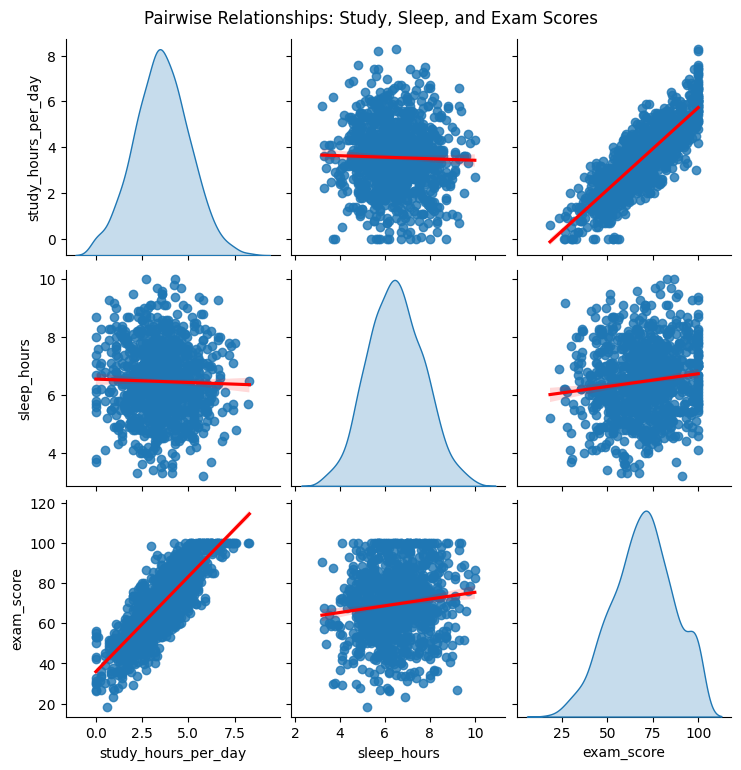

In [3]:
sns.pairplot(df[['study_hours_per_day', 'sleep_hours', 'exam_score']], kind= 'reg', diag_kind= 'kde', plot_kws= {'line_kws':{'color': 'red'}})
plt.suptitle('Pairwise Relationships: Study, Sleep, and Exam Scores', y= 1.02)
plt.show()

<ipython-input-4-191b20dbf2e6>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df['study_hours_per_day'], df['sleep_hours'], df['exam_score'], cmap= 'viridis', s=60)


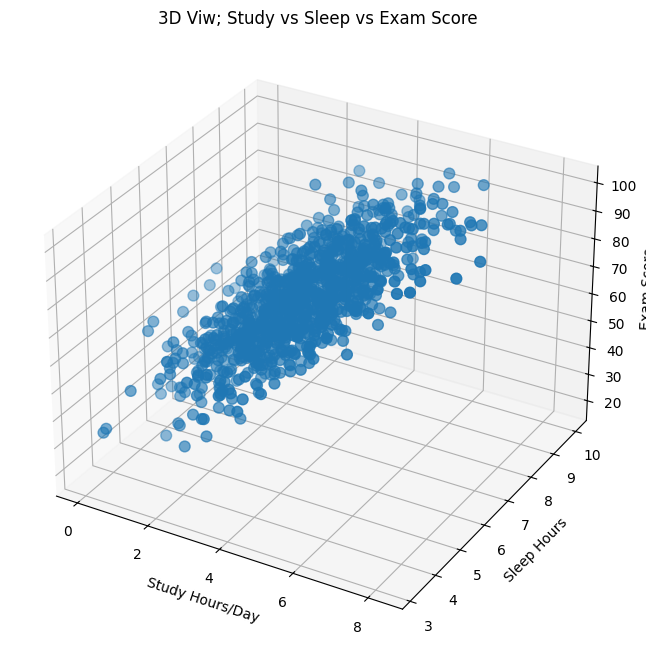

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (10,8))
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(df['study_hours_per_day'], df['sleep_hours'], df['exam_score'], cmap= 'viridis', s=60)
ax.set_xlabel('Study Hours/Day')
ax.set_ylabel('Sleep Hours')
ax.set_zlabel('Exam Score')
ax.set_title('3D Viw; Study vs Sleep vs Exam Score')
plt.show()

#14.How do diet_quality, exercise_frequency, and mental_health_rating relate to each other?

In [5]:
diet_map ={'Poor':1, 'Average':2, 'Good':3}
exercise_map = {'Never': 1, 'Sometimes': 2, 'Regularly': 3}

df['diet_score'] = df['diet_quality'].map(diet_map)
df['exercise_score'] = df['exercise_frequency'].map(exercise_map)

                      diet_score  exercise_score  mental_health_rating
diet_score              1.000000             NaN              0.014848
exercise_score               NaN             NaN                   NaN
mental_health_rating    0.014848             NaN              1.000000


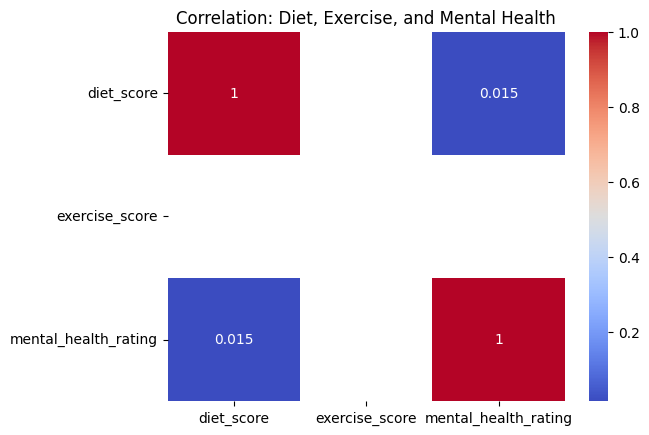

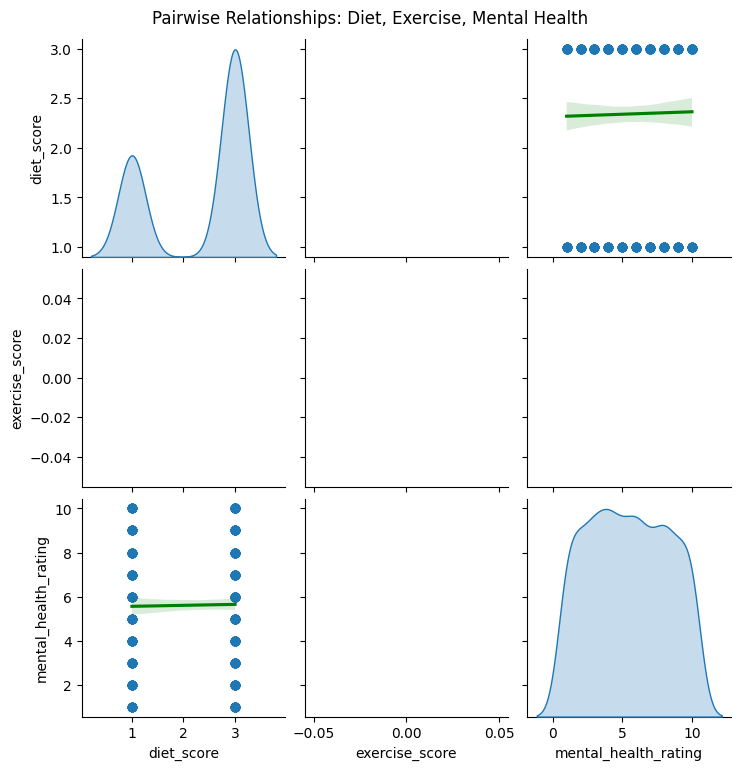

In [6]:
# Correlation matrix
subset = df[['diet_score', 'exercise_score', 'mental_health_rating']]
corr_matrix = subset.corr()
print(corr_matrix)

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation: Diet, Exercise, and Mental Health')
plt.show()

# Pairplot for deeper insight
sns.pairplot(subset, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'green'}})
plt.suptitle('Pairwise Relationships: Diet, Exercise, Mental Health', y=1.02)
plt.show()


#15.Among students with high attendance and good internet quality, how does study_hours_per_day affect exam_score?

In [7]:
# Assuming "Good", "Average", "Poor" for internet quality
filtered_df = df[(df['attendance_percentage'] >= 85) & (df['internet_quality'] == 'Good')]
print(f"Filtered students: {len(filtered_df)}")

Filtered students: 209


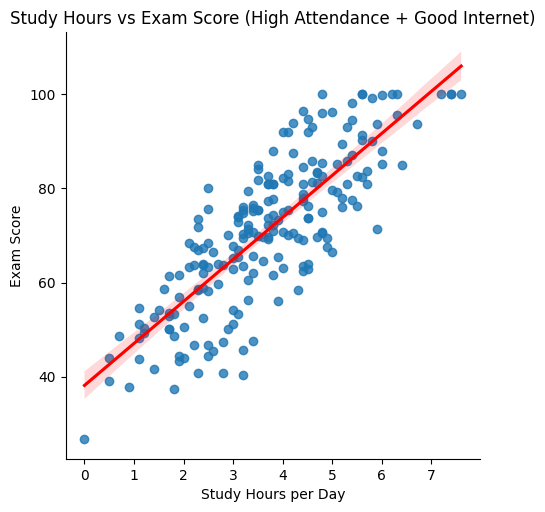

Correlation (Study Hours vs Exam Score) in Filtered Group: 0.82


In [8]:
# Visualizing the relationship between study hours and exam score
sns.lmplot(x='study_hours_per_day', y='exam_score', data=filtered_df, line_kws={'color': 'red'})
plt.title('Study Hours vs Exam Score (High Attendance + Good Internet)')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.show()

# Correlation value
correlation = filtered_df['study_hours_per_day'].corr(filtered_df['exam_score'])
print(f"Correlation (Study Hours vs Exam Score) in Filtered Group: {correlation:.2f}")
